# Installing Packages and Dependencies

In [1]:
!pip install tensorflow-text==2.4.2
!pip install tf-models-official==2.4
!pip install tensorflow-gpu==2.4.2
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

     |████████████████████████████████| 3.4 MB 842 kB/s            
     |████████████████████████████████| 394.5 MB 33 kB/s              
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 462 kB 48.1 MB/s            
     |████████████████████████████████| 3.8 MB 48.7 MB/s            
     |████████████████████████████████| 2.9 MB 44.8 MB/s            
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=77050 sha256=4a9ecb1f27c063f711ff44781951613a9f6849c1de3479ffc0da6d21ed7b30b8
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Succe

2022-03-20 07:09:51.272118: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
print(tf.__version__)

2.4.2


In [3]:
!nvidia-smi 

Sun Mar 20 07:09:56 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.119.04   Driver Version: 450.119.04   CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
tf.test.is_gpu_available()

2022-03-20 07:09:57.326570: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-20 07:09:57.327086: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-20 07:09:57.328650: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-03-20 07:09:57.373345: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-20 07:09:57.374188: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla 

True

3663: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-20 07:09:58.174430: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-20 07:09:58.175058: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-20 07:09:58.175625: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1406] Created TensorFlow device (/device:GPU:0 with 14957 MB memory) -> physical GPU (device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0)


# Reading Training Data

In [5]:
df_train = pd.read_csv("../input/covid-misinfo/Constraint_English_Train.csv")
df_val = pd.read_csv("../input/covid-misinfo/Constraint_English_Val.csv")
df_test = pd.read_csv("../input/covid-misinfo/Constraint_English_Test.csv")
df = pd.concat([df_train, df_val, df_test], ignore_index=True)
df.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [6]:
df.shape

(10700, 3)

# Training Data Insight

In [7]:
df.groupby('label').describe()

id                                                                
        count         mean          std  min     25%     50%      75%     max
label                                                                        
fake   5100.0  2373.648627  1821.186440  1.0  902.00  1812.0  3761.50  6419.0
real   5600.0  2337.061071  1819.161764  1.0  884.75  1757.0  3726.75  6420.0

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


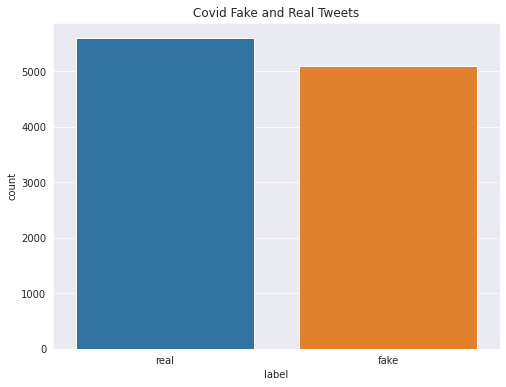

In [8]:
plt.figure(figsize=(8,6))
sns.set_style(style='darkgrid')
sns.countplot(df['label'])
plt.title("Covid Fake and Real Tweets")
plt.show()

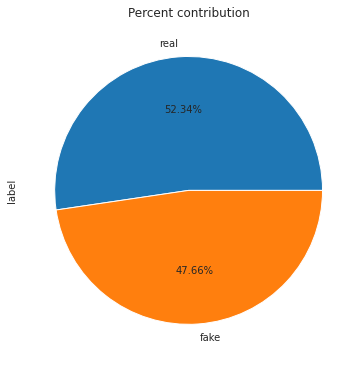

In [9]:
plt.figure(figsize=(6,8))
sns.set_style("darkgrid")
df["label"].value_counts().plot.pie(autopct='%0.2f%%')
plt.title("Percent contribution")
plt.show()

# Data Cleaning

In [10]:
#Data Cleaning
ps = PorterStemmer()
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
en_stopwords = set(stopwords.words("english"))
#en_stopwords

In [12]:
def cleaner(text):
    try:
        url_re = re.compile(r'(http|ftp|https)://([\w+?\.\w+])+([a-zA-Z0-9\~\!\@\#\$\%\^\&\*\(\)_\-\=\+\\\/\?\.\:\;\'\,]*)?')
        cleaned = url_re.sub("",text)
        #print(cleaned)
        
        hashtag_re = re.compile(r'(#\w+)')
        cleaned = hashtag_re.sub("",cleaned)
        #print(cleaned)
        
        screen_name_re = re.compile(r'(@\w+)')
        cleaned = screen_name_re.sub("", cleaned)
        #print(cleaned)
        
        emoji_re = re.compile("["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U0001F1F2-\U0001F1F4"  # Macau flag
                u"\U0001F1E6-\U0001F1FF"  # flags
                u"\U0001F600-\U0001F64F"
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u"\U0001F1F2"
                u"\U0001F1F4"
                u"\U0001F620"
                u"\u200d"
                u"\u2640-\u2642"
                "]+", flags=re.UNICODE)
        cleaned = emoji_re.sub("",cleaned)
        #print(cleaned)
        
        cleaned = cleaned.replace("."," ").replace("//"," ")
        cleaned = re.sub(r'[^a-zA-Z]', " ", cleaned) #Replacing all non-alphabets with " "
        cleaned = re.sub(r'\w+\d+', " ", cleaned) #Removes alphanumeric words
        #print("Before Stemming: ",cleaned)
        cleaned = ps.stem(cleaned)
        #print("After Stemming: ",cleaned)
        cleaned = " ".join([word for word in cleaned.split() if len(word)>2]) #Removing words with len<2
        cleaned = " ".join([word for word in cleaned.split() if word not in en_stopwords])
        #print(cleaned)
        cleaned = cleaned.strip() #Removing whitespaces
        cleaned = cleaned.lower() #Converting to lower case
        #print("After Stemming Split: ",cleaned)
    except:
        cleaned = ""
    return cleaned

#cleaner("#Booomer is very funny and the the love. ")
    
df['tweet'] = df['tweet'].apply(lambda text: cleaner(text))
df.head()

,id,tweet,label
0,1,cdc currently reports deaths general discrepan...,real
1,2,states reported deaths small rise last tuesday...,real
2,3,politically correct woman almost uses pandemic...,fake
3,4,testing laboratories india august tests done,real
4,5,populous states generate large case counts loo...,real


# Generating Word Clouds

In [13]:
df

,id,tweet,label
0,1,cdc currently reports deaths general discrepan...,real
1,2,states reported deaths small rise last tuesday...,real
2,3,politically correct woman almost uses pandemic...,fake
3,4,testing laboratories india august tests done,real
4,5,populous states generate large case counts loo...,real
...,...,...,...
10695,2136,state wise details total confirmed cases till ...,real
10696,2137,tonight midnight onwards disaster management a...,fake
10697,2138,new cases plateau enugu oyo lagos rivers fct k...,real
10698,2139,one stop shop resources section communicating ...,real


In [14]:
#Function to get word frequencies in the data
def get_word_freqs(df, col):
    text = ' '.join(df[col])
    text = text.split()
    freq = pd.Series(text).value_counts()
    return freq

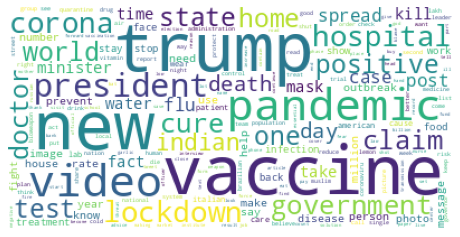

In [15]:
freq_words_fake = get_word_freqs(df[df['label']=='fake'],'tweet')
freq_words_fake = " ".join(freq_words_fake.index)
word_cloud=WordCloud(max_font_size=60,background_color='white').generate(freq_words_fake)
plt.figure(figsize=(8,6))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

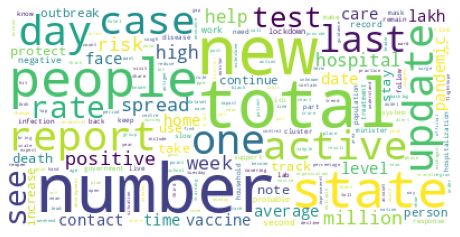

In [16]:
freq_words_real = get_word_freqs(df[df['label']=='real'],'tweet')
freq_words_real = " ".join(freq_words_real.index)
word_cloud=WordCloud(max_font_size=60,background_color='white').generate(freq_words_real)
plt.figure(figsize=(8,6))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [17]:
#freq_words_real

In [18]:
#splitting the labels
df_real = df[df['label']=='real']
df_real.shape

(5600, 3)

In [19]:
df_fake = df[df['label']=='fake']
df_fake.shape

(5100, 3)

# Downsampling Data

In [20]:
#unbalanced data so we downsample it
df_real_downsampled = df_real.sample(df_fake.shape[0])
df_real_downsampled.shape

(5100, 3)

In [21]:
df_balanced = pd.concat([df_fake, df_real_downsampled])
df_balanced['label'].value_counts()

fake    5100
real    5100
Name: label, dtype: int64

In [22]:
df_balanced['fake'] = df_balanced['label'].apply(lambda x: 1 if x == 'fake' else 0)
df_balanced.sample(5)

,id,tweet,label,fake
2854,2855,total number confirmed cases active cases one ...,real,0
3199,3200,italian billionaire commits suicide throwing f...,fake,1
7022,603,whether countries high rates childhood vaccine...,fake,1
4191,4192,bill gates wrote letter says coronavirus spiri...,fake,1
3227,3228,hydroxychloroqen memory supplement,fake,1


# Model Construction

In [23]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

2022-03-20 07:10:20.445659: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-20 07:10:20.445982: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-20 07:10:20.446631: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2022-03-20 07:10:20.446706: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-03-20 07:10:20.446759: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-03-20 07:10:20.446779: I tensorflow/stream_executor/platform/

In [24]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

In [25]:
# 4FC
# #Bert Layers
# text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
# preprocessed_text = bert_preprocess(text_input)
# outputs = bert_encoder(preprocessed_text)

# #Neural Network Layers
# fc1 = tf.keras.layers.Dense(1024, activation='relu', name='fullyConnected1')(outputs['pooled_output'])
# dropout2 = tf.keras.layers.Dropout(0.1, name='dropout2')(fc1)
# fc2 = tf.keras.layers.Dense(512, activation='relu', name='fullyConnected2')(dropout2)
# dropout3 = tf.keras.layers.Dropout(0.1, name='dropout3')(fc2)
# fc3 = tf.keras.layers.Dense(256, activation='relu', name='fullyConnected3')(dropout3)
# dropout4 = tf.keras.layers.Dropout(0.1, name='dropout4')(fc3)
# fc4 = tf.keras.layers.Dense(128, activation='relu', name='fullyConnected4')(dropout4)
# dense = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(fc4)

# #Final Model
# model = tf.keras.Model(inputs=[text_input], outputs=[dense])

# 3FC
#Bert Layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

#Neural Network Layers
dropout1 = tf.keras.layers.Dropout(0.1, name='dropout1')(outputs['pooled_output'])
fc1 = tf.keras.layers.Dense(512, activation='relu', name='fullyConnected1')(dropout1)
dropout2 = tf.keras.layers.Dropout(0.1, name='dropout2')(fc1)
fc2 = tf.keras.layers.Dense(256, activation='relu', name='fullyConnected2')(dropout2)
dropout3 = tf.keras.layers.Dropout(0.1, name='dropout3')(fc2)
fc3 = tf.keras.layers.Dense(128, activation='relu', name='fullyConnected3')(dropout3)
dense = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(dropout3)

#Final Model
model = tf.keras.Model(inputs=[text_input], outputs=[dense])

In [26]:
METRICS = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=METRICS)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               [(None,)]            0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        {'input_word_ids': ( 0           text[0][0]                       
__________________________________________________________________________________________________
keras_layer_1 (KerasLayer)      {'sequence_output':  109482241   keras_layer[0][0]                
                                                                 keras_layer[0][1]                
                                                                 keras_layer[0][2]                
______________________________________________________________________________________________

In [27]:
X_train = df_balanced[['tweet']] 
y_train = df_balanced[['fake']]

In [28]:
# df_val = pd.read_csv("../input/covid-misinfo/Constraint_English_Val.csv")
# df_val['tweet'] = df_val['tweet'].apply(lambda text: cleaner(text))
# df_val['fake'] = df_val['label'].apply(lambda x: 1 if x == 'fake' else 0)
# X_val = df_val[['tweet']] 
# y_val = df_val[['fake']]

In [29]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode="min"),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                              mode='min',
                              verbose=1,
                              patience=3,
                              min_delta=0.0001,
                              factor=0.2
                             )
]


# Training the Model

In [30]:
h1 = model.fit(X_train, y_train, epochs= 30, callbacks = callbacks, verbose=1)

Epoch 1/30


2022-03-20 07:10:53.905543: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-03-20 07:10:54.773924: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11


319/319 [==============================] - 76s 212ms/step - loss: 0.5991 - accuracy: 0.6699 - precision: 0.6787 - recall: 0.6662
Epoch 2/30
319/319 [==============================] - 67s 211ms/step - loss: 0.4122 - accuracy: 0.8158 - precision: 0.8116 - recall: 0.8232
Epoch 3/30
319/319 [==============================] - 68s 212ms/step - loss: 0.3861 - accuracy: 0.8288 - precision: 0.8184 - recall: 0.8408
Epoch 4/30
319/319 [==============================] - 68s 212ms/step - loss: 0.3768 - accuracy: 0.8356 - precision: 0.8336 - recall: 0.8344
Epoch 5/30
319/319 [==============================] - 68s 214ms/step - loss: 0.3729 - accuracy: 0.8387 - precision: 0.8302 - recall: 0.8486
Epoch 6/30
319/319 [==============================] - 68s 212ms/step - loss: 0.3541 - accuracy: 0.8468 - precision: 0.8461 - recall: 0.8444
Epoch 7/30
319/319 [==============================] - 68s 213ms/step - loss: 0.3665 - accuracy: 0.8410 - precision: 0.8338 - recall: 0.8557
Epoch 8/30
319/319 [===========

In [31]:
h1.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'lr'])

In [32]:
def plot_metrics(h):
    #Plotting metrics
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(h.history['loss']);
    plt.title("Loss vs Epochs");
    plt.ylabel("Loss");
    plt.xlabel("Epochs");
    plt.legend(['train']);

    # summarize history for accuracy
    plt.subplot(1,2,2)
    plt.plot(h.history['accuracy'])
    plt.title('Accuracy vs Epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['train'], loc='upper left')
    plt.show()

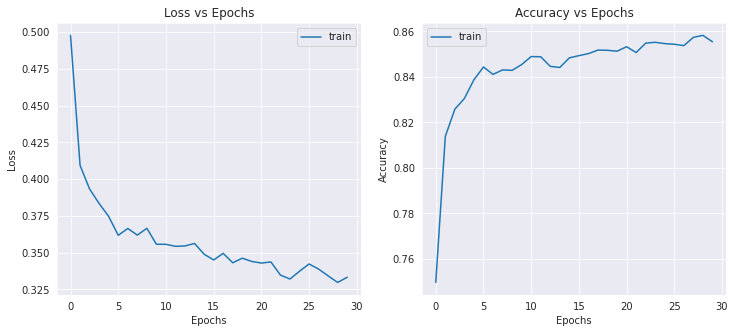

In [33]:
plot_metrics(h1)

In [34]:
model.save('Final_BERT_10K.h5')

# Model Evaluation on Test Data

In [35]:
# df_test = pd.read_csv("../input/covid-misinfo/Constraint_English_Test.csv")
# df_test['tweet'] = df_test['tweet'].apply(lambda text: cleaner(text))
# df_test['fake'] = df_test['label'].apply(lambda x: 1 if x == 'fake' else 0)
# X_test = df_test[['tweet']] 
# y_test = df_test[['fake']]

# X_test.shape

In [36]:
# test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test)

# print("Test Loss: ", test_loss)
# print("Test Precision: ", test_precision)
# print("Test Recall: ", test_recall)
# print("Test Accuracy: ", test_accuracy)

In [37]:
# y_pred = model.predict(X_test)
# y_pred = y_pred.flatten()
# y_pred = np.where(y_pred>0.5, 1, 0)

In [38]:
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
# plt.show()